In [1]:
import numpy as np
import pandas as pd
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# flux1=pd.read_table('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/flux.th',delimiter=' ',header=0, names=['time(s)','coyote','ccc_rock','ccc_old','swp','cvp','sjr','calaveras','east','american','sac','yolo_toedrain','yolo','northbay','napa','ccc_victoria'])
#flux1=pd.read_table('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_2_restart_2018_04_18/flux.th',header=0, names=['time(s)','coyote','ccc_rock','ccc_old','swp','cvp','sjr','calaveras','east','american','sac','yolo_toedrain','yolo','northbay','napa','ccc_victoria'])

flux1=pd.read_csv('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_15/flux.commas.csv',header=None,dtype=np.float32, names=['time','coyote','ccc_rock','ccc_old','swp','cvp','sjr','calaveras','east','american','sac','yolo_toedrain','yolo','northbay','napa','ccc_victoria'])
print(flux1)

               time  coyote  ccc_rock  ccc_old        swp         cvp  \
0               0.0   -0.39      0.00     5.60  32.349998  122.089996   
1             900.0   -0.38      0.00     5.57  32.349998  122.070000   
2            1800.0   -0.38      0.00     5.55  32.360001  122.050003   
3            2700.0   -0.38      0.00     5.53  32.360001  122.029999   
4            3600.0   -0.37      0.00     5.52  32.360001  122.019997   
...             ...     ...       ...      ...        ...         ...   
131708  118537200.0   -0.84      2.46     4.18   1.680000   24.850000   
131709  118538096.0   -0.84      2.44     4.22   1.700000   24.719999   
131710  118539000.0   -0.84      2.41     4.27   1.720000   24.570000   
131711  118539904.0   -0.84      2.39     4.33   1.770000   24.389999   
131712  118540800.0   -0.84      2.35     4.40   1.840000   24.180000   

               sjr  calaveras       east    american         sac  \
0       -12.230000        0.0  -1.580000  -74.190002 -2

In [3]:
#need to use a csv 
#flux2=pd.read_table('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_3/flux.th',delimiter=' ',header=0, names=['time(s)','coyote','ccc_rock','ccc_old','swp','cvp','sjr','calaveras','east','american','sac','yolo_toedrain','yolo','northbay','napa','ccc_victoria'])
flux2=flux1.copy()
flux2['sac']=flux1['sac']*1.3
flux3=flux1.copy()
flux3['sac']=flux1['sac']*0.9

In [4]:
flux3

,time,coyote,ccc_rock,ccc_old,swp,cvp,sjr,calaveras,east,american,sac,yolo_toedrain,yolo,northbay,napa,ccc_victoria
0,0.0,-0.39,0.00,5.60,32.349998,122.089996,-12.230000,0.0,-1.580000,-74.190002,-241.263000,14.61,-0.01,2.32,0.00,0.0
1,900.0,-0.38,0.00,5.57,32.349998,122.070000,-12.230000,0.0,-1.570000,-74.190002,-240.930008,13.34,-0.01,2.32,0.00,0.0
2,1800.0,-0.38,0.00,5.55,32.360001,122.050003,-12.230000,0.0,-1.590000,-72.489998,-239.832001,11.67,-0.01,2.31,0.00,0.0
3,2700.0,-0.38,0.00,5.53,32.360001,122.029999,-12.230000,0.0,-1.570000,-73.059998,-238.742981,9.57,-0.01,2.31,0.00,0.0
4,3600.0,-0.37,0.00,5.52,32.360001,122.019997,-12.200000,0.0,-1.570000,-73.620003,-239.174988,8.10,-0.01,2.31,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131708,118537200.0,-0.84,2.46,4.18,1.680000,24.850000,-179.250000,0.0,-63.320000,-116.379997,-674.406006,0.06,-0.01,1.55,-1.68,0.0
131709,118538096.0,-0.84,2.44,4.22,1.700000,24.719999,-180.100006,0.0,-63.450001,-115.820000,-674.406006,0.06,-0.01,1.55,-1.65,0.0
131710,118539000.0,-0.84,2.41,4.27,1.720000,24.570000,-179.529999,0.0,-63.360001,-116.379997,-674.406006,0.06,-0.01,1.55,-1.65,0.0
131711,118539904.0,-0.84,2.39,4.33,1.770000,24.389999,-180.380005,0.0,-63.500000,-116.379997,-674.406006,0.06,-0.01,1.55,-1.65,0.0


In [5]:
type(flux1.time[0])
#need to convert time vector 

numpy.float32

In [6]:
timedelta1 = [pd.Timedelta(i, unit = 's') for i in flux1.time]
timestamp1 = [pd.to_datetime("08-11-2020 00:00") + i for i in timedelta1]
flux1["time"] = timestamp1
flux2["time"] = timestamp1
flux3["time"] = timestamp1

In [7]:
#too many datapoints to plot the raw data so try taking a daily average 
#need to set datetime as index first
flux1_dated=flux1.set_index(pd.DatetimeIndex(flux1.time))
flux2_dated=flux2.set_index(pd.DatetimeIndex(flux2.time))
flux3_dated=flux3.set_index(pd.DatetimeIndex(flux3.time))
print(flux3_dated)

                                   time  coyote  ccc_rock  ccc_old        swp  \
time                                                                            
2020-08-11 00:00:00 2020-08-11 00:00:00   -0.39      0.00     5.60  32.349998   
2020-08-11 00:15:00 2020-08-11 00:15:00   -0.38      0.00     5.57  32.349998   
2020-08-11 00:30:00 2020-08-11 00:30:00   -0.38      0.00     5.55  32.360001   
2020-08-11 00:45:00 2020-08-11 00:45:00   -0.38      0.00     5.53  32.360001   
2020-08-11 01:00:00 2020-08-11 01:00:00   -0.37      0.00     5.52  32.360001   
...                                 ...     ...       ...      ...        ...   
2024-05-13 23:00:00 2024-05-13 23:00:00   -0.84      2.46     4.18   1.680000   
2024-05-13 23:14:56 2024-05-13 23:14:56   -0.84      2.44     4.22   1.700000   
2024-05-13 23:30:00 2024-05-13 23:30:00   -0.84      2.41     4.27   1.720000   
2024-05-13 23:45:04 2024-05-13 23:45:04   -0.84      2.39     4.33   1.770000   
2024-05-14 00:00:00 2024-05-

In [8]:
flux1_daily=flux1_dated.resample('D').mean()
flux2_daily=flux2_dated.resample('D').mean()
flux3_daily=flux3_dated.resample('D').mean()
print(flux3_daily)

                          time    coyote  ccc_rock   ccc_old        swp  \
time                                                                      
2020-08-11 2020-08-11 11:52:30 -0.370104  0.000000  5.399583  41.896667   
2020-08-12 2020-08-12 11:52:30 -0.401042  0.000000  4.698542  39.749062   
2020-08-13 2020-08-13 11:52:30 -0.388750  0.000000  4.694896  34.739792   
2020-08-14 2020-08-14 11:52:30 -0.371458  0.000000  5.492917  34.988541   
2020-08-15 2020-08-15 11:52:30 -0.374167  0.000000  5.854687  42.446148   
...                        ...       ...       ...       ...        ...   
2024-05-10 2024-05-10 11:52:30 -1.098750  3.228854  3.566354  20.695000   
2024-05-11 2024-05-11 11:52:30 -0.990833  2.636042  3.540313  19.666458   
2024-05-12 2024-05-12 11:52:30 -0.920729  2.321771  3.340625  12.763125   
2024-05-13 2024-05-13 11:52:30 -0.869062  2.549167  3.932083  19.808542   
2024-05-14 2024-05-14 00:00:00 -0.840000  2.350000  4.400000   1.840000   

                   cvp  

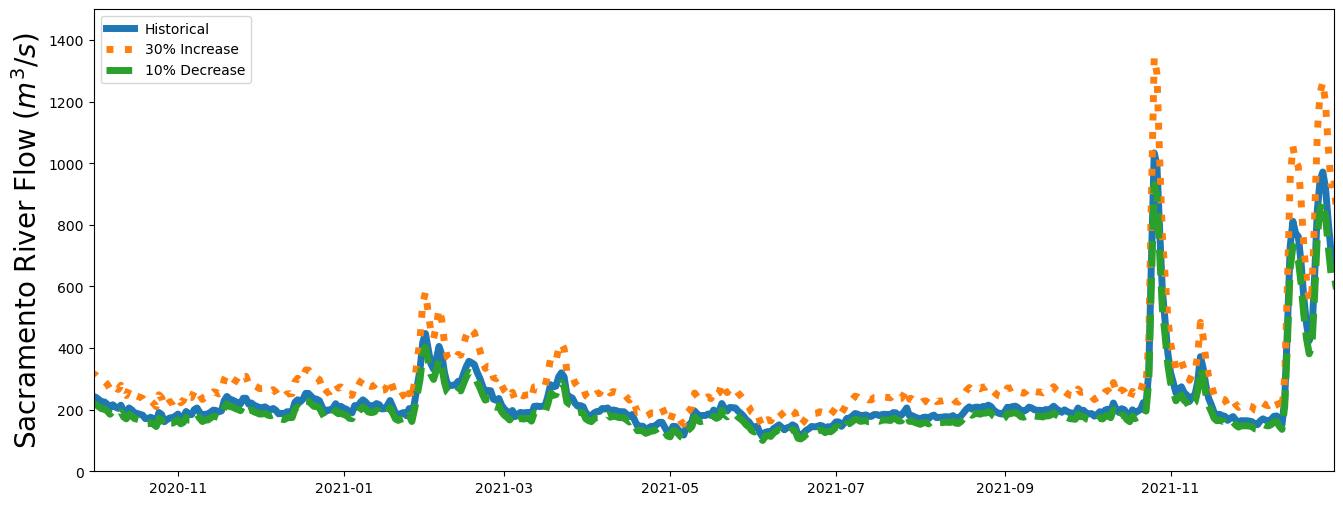

In [15]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.gca()

# ax1.plot(flux1_daily.swp+flux1_daily.cvp,label='Historical',linewidth=5)
# ax1.plot(flux2_daily.swp+flux2_daily.cvp,label='Decr Exp',linestyle=':',linewidth=5)
# ax1.plot(flux3_daily.swp+flux3_daily.cvp,label='Incr Inf',linestyle='--',linewidth=5)
# ax2 = ax1.twinx()
ax1.plot(flux1_daily.sac*-1,label='Historical',linewidth=5)
ax1.plot(flux2_daily.sac*-1,label='30% Increase',linestyle=':',linewidth=5)
ax1.plot(flux3_daily.sac*-1,label='10% Decrease',linestyle='--',linewidth=5)

ax1.set_xlim(pd.to_datetime("10-01-2020 00:00"),pd.to_datetime("12-31-2021 00:00"))
# ax1.set_ylabel('SWP + CVP Pumping $(m^3/s)$',fontsize=20)
ax1.set_ylim(0,1500)
ax1.set_ylabel('Sacramento River Flow $(m^3/s)$',fontsize=20)
#ax1.set_ylim(-400,-200)
leg = ax1.legend()
plt.show()

In [10]:
# flux1_daily.sac.values

In [11]:
# #make sac river flow positive
# flux1_daily.sac=-1*flux1_daily.sac.values


/scratch/jisrael/job_43576024/ipykernel_3503273/2893957792.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
/scratch/jisrael/job_43576024/ipykernel_3503273/2893957792.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[1].set_xlim(flux1_daily.time[542],flux1_daily.time[695])


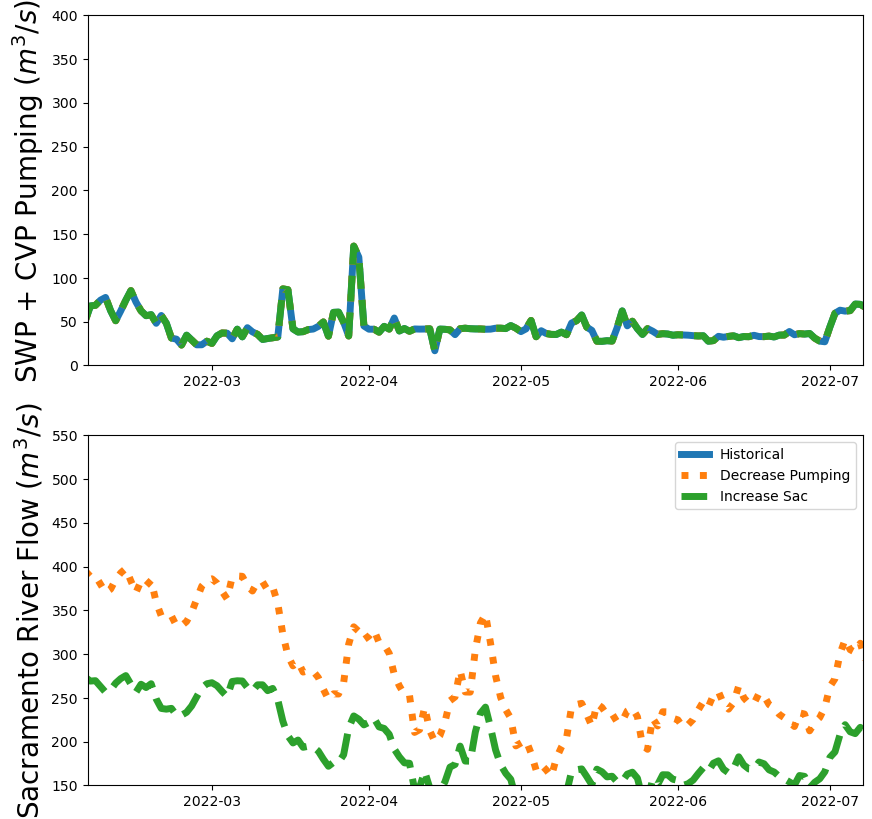

In [12]:
#fig = plt.figure(figsize=(16,6))
fig, axs = plt.subplots(2, figsize=(10, 10))

axs[0].plot(flux1_daily.swp+flux1_daily.cvp,label='Historical',linewidth=5)
axs[0].plot(flux2_daily.swp+flux2_daily.cvp,label='Decr Exp',linestyle=':',linewidth=5)
axs[0].plot(flux3_daily.swp+flux3_daily.cvp,label='Incr Inf',linestyle='--',linewidth=5)

axs[1].plot(flux1_daily.sac,label='Historical',linewidth=5)
axs[1].plot(-1*flux2_daily.sac,label='Decrease Pumping',linestyle=':',linewidth=5)
axs[1].plot(-1*flux3_daily.sac,label='Increase Sac',linestyle='--',linewidth=5)

axs[0].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
axs[0].set_ylabel('SWP + CVP Pumping $(m^3/s)$',fontsize=20)
axs[0].set_ylim(0,400)

axs[1].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
axs[1].set_ylabel('Sacramento River Flow $(m^3/s)$',fontsize=20)
axs[1].set_ylim(150,550)
leg = axs[1].legend()
plt.show()

In [13]:
print(flux1_daily.time[542],flux1_daily.time[695])

2022-02-04 11:52:30 2022-07-07 11:52:30


/scratch/jisrael/job_43576024/ipykernel_3503273/897637091.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(flux1_daily.time[542],flux1_daily.time[695])


In [14]:
#repeat of above but with a third panel of net delta outflow 
ndo1=pd.read_csv('/expanse/lustre/scratch/jisrael/temp_project/post_processesed_run_data/2025_05_13/schism_{experiment}/run_2_restart_2018_04_18.csv')
ndo1

FileNotFoundError: [Errno 2] No such file or directory: '/expanse/lustre/scratch/jisrael/temp_project/post_processesed_run_data/2025_05_13/schism_{experiment}/run_2_restart_2018_04_18.csv'

In [ ]:
#repeat of above but with a third panel of net delta outflow
ndo1=pd.read_csv('/expanse/lustre/scratch/jisrael/temp_project/post_processesed_run_data/2025_05_13/schism_{experiment}/run_2_restart_2018_04_18.csv',date_format='%y-%m-%d %H:%M:%S')
ndo1['datetime']=pd.to_datetime(ndo1['0'])
ndo1_clean=ndo1.set_index('datetime')

ndo2=pd.read_csv('/expanse/lustre/scratch/jisrael/temp_project/post_processesed_run_data/2025_05_13/schism_{experiment}/run_3.csv',date_format='%y-%m-%d %H:%M:%S')
ndo2['datetime']=pd.to_datetime(ndo2['0'])
ndo2_clean=ndo2.set_index('datetime')

ndo3=pd.read_csv('/expanse/lustre/scratch/jisrael/temp_project/post_processesed_run_data/2025_05_13/schism_{experiment}/run_4.csv',date_format='%y-%m-%d %H:%M:%S')
ndo3['datetime']=pd.to_datetime(ndo3['0'])
ndo3_clean=ndo3.set_index('datetime')
ndo3_clean

In [ ]:
dpi = 300
image_save_dpi = 450
image_format = "tif"

import matplotlib
import matplotlib_inline
%matplotlib inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi

In [ ]:
#fig = plt.figure(figsize=(16,6))

fig, axs = plt.subplots(3, figsize=(10, 16))

axs[0].plot(flux1_daily.swp+flux1_daily.cvp,label='Historical',linewidth=5)
axs[0].plot(flux2_daily.swp+flux2_daily.cvp,label='20% Decreased Exports',linestyle='--',linewidth=5)
axs[0].plot(flux3_daily.swp+flux3_daily.cvp,label='Equivalent Increased Sac River',linestyle=':',linewidth=5)

axs[1].plot(-1*flux1_daily.sac,label='Historical',linewidth=5)
axs[1].plot(-1*flux2_daily.sac,label='20% Decreased Exports',linestyle='--',linewidth=5)
axs[1].plot(-1*flux3_daily.sac,label='Equivalent Increased Sac River',linestyle=':',linewidth=5)

axs[2].plot(-1*ndo1_clean['Net Delta Outflow In [cms]'],label='Historical',linewidth=5)
axs[2].plot(-1*ndo2_clean['Net Delta Outflow In [cms]'],label='20% Decrease in Exports',linestyle='--',linewidth=5)
axs[2].plot(-1*ndo3_clean['Net Delta Outflow In [cms]'],label='Equivalent Increase Sac River',linestyle=':',linewidth=5)


axs[0].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
axs[0].set_ylabel('SWP + CVP Pumping $(m^3/s)$',fontsize=20)
axs[0].set_ylim(0,400)

axs[1].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
axs[1].set_ylabel('Sacramento River Flow $(m^3/s)$',fontsize=20)
axs[1].set_ylim(150,550)

axs[2].set_xlim(flux1_daily.time[542],flux1_daily.time[695]) #ideally use the same time frame even if the points do not appear in the vector 2018-06-27 11:52:30 2018-11-27 11:52:30
axs[2].set_ylabel('Net Delta Outflow Index $(m^3/s)$',fontsize=20)
axs[2].set_ylim(100,500)


leg = axs[0].legend()
plt.show()
image_name = "high_res_plots/exports_and_sac_NDOI_3_figs"+"."+image_format
#image_format = "svg"
fig.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)

In [ ]:
#repeat of above but with just historical and decreased exports 
#fig = plt.figure(figsize=(16,6))

fig, axs = plt.subplots(2, figsize=(10,10))

axs[0].plot(flux1_daily.swp+flux1_daily.cvp,label='Historical',linewidth=5)
axs[0].plot(flux2_daily.swp+flux2_daily.cvp,label='20% Decreased Exports',linestyle='--',linewidth=5)
#axs[0].plot(flux3_daily.swp+flux3_daily.cvp,label='Incr Inf',linestyle=':',linewidth=5)

# axs[1].plot(-1*flux1_daily.sac,label='Historical',linewidth=5)
# axs[1].plot(-1*flux2_daily.sac,label='20% Decreased Exports',linestyle='--',linewidth=5)
# #axs[1].plot(-1*flux3_daily.sac,label='Increase Sac',linestyle=':',linewidth=5)

axs[1].plot(-1*ndo1_clean['Net Delta Outflow In [cms]'],label='Historical',linewidth=5)
axs[1].plot(-1*ndo2_clean['Net Delta Outflow In [cms]'],label='20% Decreased Exports',linestyle='--',linewidth=5)
#axs[2].plot(-1*ndo3_clean['Net Delta Outflow In [cms]'],label='Increase Sac',linestyle=':',linewidth=5)


axs[0].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
axs[0].set_ylabel('SWP + CVP Pumping $(m^3/s)$',fontsize=20)
axs[0].set_ylim(0,400)

# axs[1].set_xlim(flux1_daily.time[542],flux1_daily.time[695])
# axs[1].set_ylabel('Sacramento River Flow $(m^3/s)$',fontsize=20)
# axs[1].set_ylim(150,550)

axs[1].set_xlim(flux1_daily.time[542],flux1_daily.time[695]) #ideally use the same time frame even if the points do not appear in the vector 2018-06-27 11:52:30 2018-11-27 11:52:30
axs[1].set_ylabel('Net Delta Outflow Index $(m^3/s)$',fontsize=20)
axs[1].set_ylim(100,500)


leg = axs[0].legend()
plt.show()
image_name = "high_res_plots/exports_NDOI_2_figs"+"."+image_format
#image_format = "svg"
fig.savefig(image_name, format=image_format, dpi=image_save_dpi, transparent=True)